[[0 0 0 0 0 0]
 [0 1 1 1 1 0]
 [0 1 1 1 1 0]
 [0 1 1 1 1 0]
 [0 1 1 1 1 0]
 [0 0 0 0 0 0]]


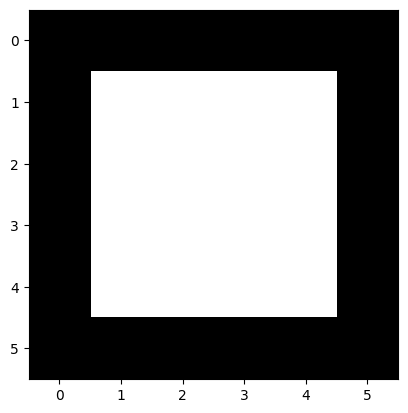

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

binary_matrix = np.array([
    [0, 0, 0, 0, 0, 0],  # Row 0
    [0, 1, 1, 1, 1, 0],  # Row 0
    [0, 1, 1, 1, 1, 0],  # Row 1
    [0, 1, 1, 1, 1, 0],  # Row 2
    [0, 1, 1, 1, 1, 0],  # Row 3
    [0, 0, 0, 0, 0, 0],  # Row 4
], dtype=np.uint8)

print(binary_matrix)

plt.imshow(binary_matrix, cmap='gray')

# More complex shape

[[1 0 0 0 0 1 0 0 0 0 1]
 [0 1 0 0 0 1 0 0 0 1 0]
 [0 0 1 0 0 1 0 0 1 0 0]
 [0 0 0 1 0 1 0 1 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 1 0 1 0 1 0 0 0]
 [0 0 1 0 0 1 0 0 1 0 0]
 [0 1 0 0 0 1 0 0 0 1 0]
 [1 0 0 0 0 1 0 0 0 0 1]]


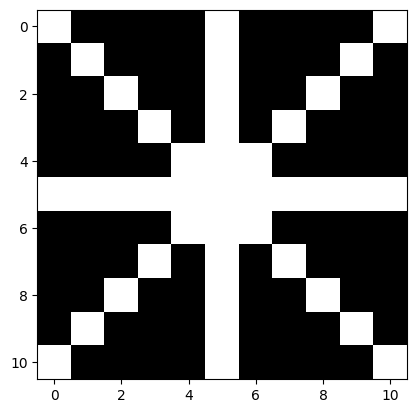

In [ ]:
binary_matrix = np.array([
  [1,0,0,0,0,1,0,0,0,0,1],
  [0,1,0,0,0,1,0,0,0,1,0],
  [0,0,1,0,0,1,0,0,1,0,0],
  [0,0,0,1,0,1,0,1,0,0,0],
  [0,0,0,0,1,1,1,0,0,0,0],
  [1,1,1,1,1,1,1,1,1,1,1],
  [0,0,0,0,1,1,1,0,0,0,0],
  [0,0,0,1,0,1,0,1,0,0,0],
  [0,0,1,0,0,1,0,0,1,0,0],
  [0,1,0,0,0,1,0,0,0,1,0],
  [1,0,0,0,0,1,0,0,0,0,1]
])

print(binary_matrix)


plt.imshow(binary_matrix, cmap='gray')

# Even more complex shape... what about cells

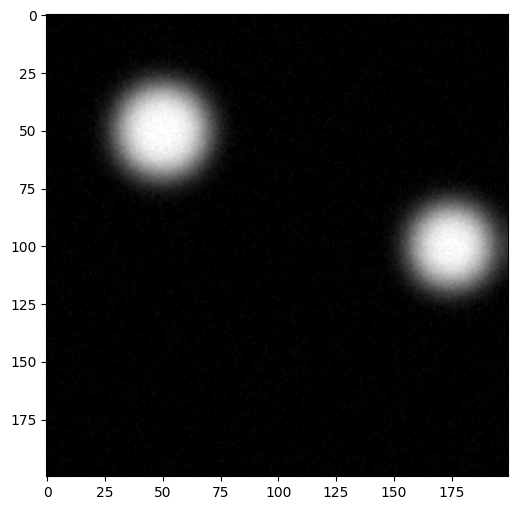

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, distance_transform_edt
from skimage.filters import threshold_otsu
from skimage.measure import label
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from ipywidgets import interact, FloatSlider

# --- 1. Generate a simulated "more spaced out cells" image ---

def make_multi_cell_image(img_size=200):
    image = np.zeros((img_size, img_size))
    y, x = np.indices(image.shape)

    # Define cell centers and radii for increased spacing
    cell_specs = [
        # (center_x, center_y, radius)
        (50, 50, 20),    # Top-left
        (175, 100, 18)   # Right edge
    ]

    for cx, cy, r in cell_specs:
        mask = (x - cx)**2 + (y - cy)**2 < r**2
        image[mask] = 1.0

    # Use a smaller blur to keep them more distinct
    image_blurry = gaussian_filter(image, sigma=6) # Reduced blur

    # Add a small amount of noise
    noise = np.random.normal(loc=0.0, scale=0.015, size=image.shape)
    image_final = np.clip(image_blurry + noise, 0, 1)

    return image_final

# Create and store our global image
global_image = make_multi_cell_image()

# Plot the image to see what we're working with
plt.figure(figsize=(6, 6))
plt.imshow(global_image, cmap='gray')
plt.show()